In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

### For df1:

### Take a look at the data in df1.

In [10]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


### Does x increase from time one to time two?

In [18]:
one = df1.time == 'one'
df1a = df1[one]
df1a.describe()

,x
count,100.000000
mean,5.726669
std,1.960576
min,2.442945
25%,4.546572
50%,5.266279
75%,6.294788
max,12.958625


In [19]:
two = df1.time == 'two'
df1b = df1[two]
df1b.describe()

,x
count,100.000000
mean,7.296448
std,2.114480
min,0.556924
25%,6.904859
50%,7.891303
75%,8.608649
max,10.250676


In [ ]:
print('The mean of time two is higher so it appears x generally increases from time one to time two.')

### Visualize the relationship between x and time.

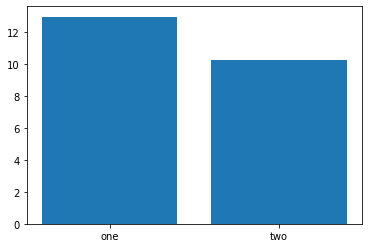

In [31]:
plt.bar(df1.time, df1.x)
plt.show()

### Run a statistical test to further examine the relationship between these features.

Statistical Test (2 Sample T-Test)
- Question - Is there a difference in x between time 1 and time 2?
- H0: There is no difference between time 1 and time 2
- Ha: There is a difference between time 1 and time 2
- alpha = 0.05

In [34]:
time_1 = df1a
time_2 = df1b
test_results = stats.ttest_ind(time_1.x , time_2.x)
test_results

Ttest_indResult(statistic=-5.443902721870272, pvalue=1.5320971681720527e-07)

In [36]:
print(f'Since p value is below alpha, we reject the null hypothesis and conclude there is a difference between time 1 and time 2')

Since p value is below alpha, we reject the null hypothesis and conclude there is a difference between time 1 and time 2


### For df2:

### Take a look at the data in df2.

In [7]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


### Visualize the relationship between x and y.

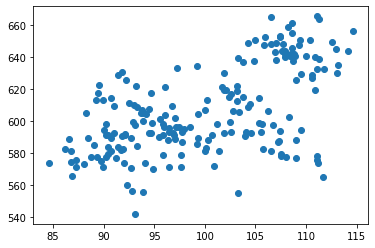

In [54]:
plt.scatter(df2.x, df2.y)
plt.show()

### How would you describe the relationship between x and y?

In [55]:
print('A moderately strong, positive linear relationship. As x increases so does y, generally.')

A moderately strong, positive linear relationship. As x increases so does y, generally.


### Run a statistical test to examine the relationship between x and y.

Pearson Correlation Test
- Question - Is there a linear relationship between x and y?
- H0: There is no linear relationship between x and y
- Ha: There is a linear relationship between x and y
- alpha = 0.05

In [60]:
# declaring variables to test for correlation on
x = df2['x']
y = df2['y']

# performing pearson correlation test
r, p = stats.pearsonr(x, y)

print(r, p)

0.5693902765694359 1.3960403186191819e-18


In [63]:
print('Since p is less than alpha and r = .56, we reject the null hypothesis and conclude there is a linear relationship between x and y. We also see that since r is .56, there is moderately strong, positive relationship between them.')

Since p is less than alpha and r = .56, we reject the null hypothesis and conclude there is a linear relationship between x and y. We also see that since r is .56, there is moderately strong, positive relationship between them.


### For df3:

### Take a look at the data in df3

In [8]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


### Which surgeon has the higher success rate?

In [68]:
surgA = df3[df3.surgeon == 'A']
surgB = df3[df3.surgeon == 'B']

In [72]:
(surgA.success).mean()

0.8770833333333333

In [73]:
(surgB.success).mean()

0.7230769230769231

In [76]:
print('Surgeon a has a higher success rate, 87%.')

Surgeon a has a higher success rate, 87%.


### If you had to have heart bypass surgery, which surgeon should you go to?

In [78]:
surgA_heart = surgA[surgA.surgery == 'heart bypass']
surgB_heart = surgB[surgB.surgery == 'heart bypass']

In [82]:
(surgA_heart.success).mean()

0.6565656565656566

In [80]:
(surgB_heart.success).mean()

0.6722488038277512

In [84]:
print(f'I''d go to surgeon b because they have a slightly higher success rate when performing heart bypass surgery, 67%.')

Id go to surgeon b because they have a slightly higher success rate when performing heart bypass surgery, 67%.


### For df1 and df2, what happens to the relationships if you take into account the group feature?

[Text(0.5, 1.0, 'Time two')]

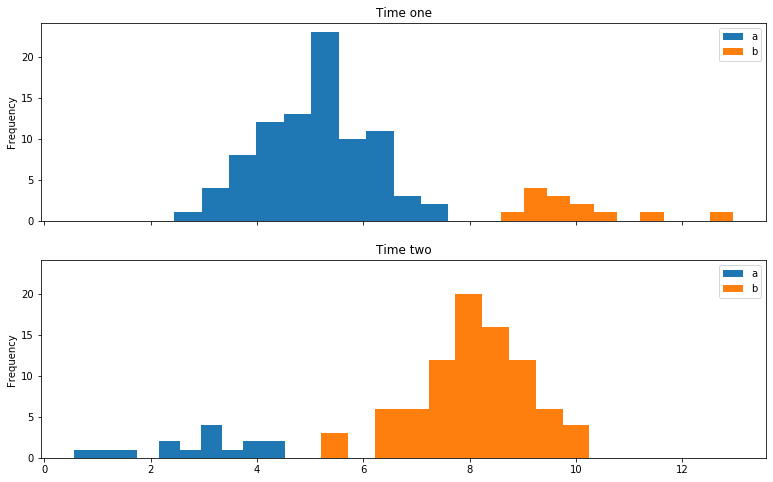

In [85]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df1.query('group == "a" & time == "one"').x.plot.hist(ax=ax1, label='a')
df1.query('group == "b" & time == "one"').x.plot.hist(ax=ax1, label='b')
ax1.set(title='Time one')
ax1.legend()
df1.query('group == "a" & time == "two"').x.plot.hist(ax=ax2, label='a')
df1.query('group == "b" & time == "two"').x.plot.hist(ax=ax2, label='b')
ax2.legend()
ax2.set(title='Time two')

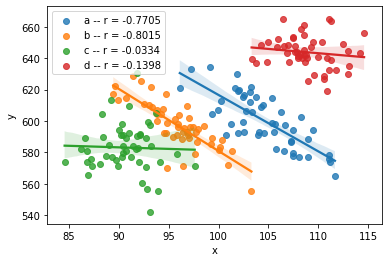

In [89]:
for group, subset in df2.groupby('group'):
    r, p = stats.pearsonr(subset.x, subset.y)
    sns.regplot(data=subset, x='x', y='y', label=f'{group} -- r = {r:.4f}')
plt.legend()

In [92]:
print(f'For df1, whereas we initially thought time was increasing from one to time two, when we control for time, we find that group a is lowering drastically from time on to time two while group b is still increased from a to b.')

For df1, whereas we initially thought time was increasing from one to time two, when we control for time, we find that group a is lowering drastically from time on to time two while group b is still increased from a to b.


In [93]:
print('For df2, whereas we initially thought that there was a positive linear relationship between x and y, we find that there is a strong negative linear relationship between x and y in groups b and c. Similarly, we see there are also negative linear relationships between x and y in groups 1 and 4, albeit weaker.')

For df2, whereas we initially thought that there was a positive linear relationship between x and y, we find that there is a strong negative linear relationship between x and y in groups b and c. Similarly, we see there are also negative linear relationships between x and y in groups 1 and 4, albeit weaker.


In [94]:
'This is known as simpson''s paradox, where a relationship reverses when controlling for a third variable. It''s going to take me some time to understand how this can happen.'

'This is known as simpsons paradox, where a relationship reverses when controlling for a third variable. Its going to take me some time to understand how this can happen.'